In [1]:
# EEFE789

In [4]:
def read_documents(filename):
    with open(filename, encoding='utf-8') as f:
        documents = [line.split('\t') for line in f.read().splitlines()]
        documents = documents[1:]
        
    return documents
    
train_docs = read_documents("naver_blog_content.txt")

In [2]:
print(len(train_docs))

19850


In [3]:
import MeCab
mecab = MeCab.Tagger()

def mecab_nouns(text):
    nouns = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile('.*\t[A-Z]+')
    
    
    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp =[tuple(pattern.match(token).group(0).split('\t')) for token in mecab.parse(text).splitlines()[:-1]]  
    # 추출한 token중에 POS가 명사 분류에 속하는 토큰만 선택.
    for token in temp:
        if token[1] == 'NNG' or token[1] == 'NNP' or token[1] == 'NNB' or token[1] == 'NNBC' or token[1] == 'NP' or token[1] == 'NR':
            nouns.append(token[0])

    return nouns

def mecab_morphs(text):
    morphs = []
    
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile('.*\t[A-Z]+')

    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    temp =[tuple(pattern.match(token).group(0).split('\t')) for token in mecab.parse(text).splitlines()[:-1]]  
        
    # 추출한 token중에 문자열만 선택.
    for token in temp:
        morphs.append(token[0])

    return morphs

def mecab_pos(text):
    pos = []
    # 우리가 원하는 TOKEN\tPOS의 형태를 추출하는 정규표현식.
    pattern = re.compile('.*\t[A-Z]+')

    # 패턴에 맞는 문자열을 추출하여 konlpy의 mecab 결과와 같아지도록 수정.
    # group(0) = str로 만듦
    pos = [tuple(pattern.match(token).group(0).split('\t')) for token in mecab.parse(text).splitlines()[:-1]]
        
    return pos

In [4]:
def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 함수.
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
        
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, 'r', encoding='utf-8') as f:
        for word in f:
            SW.add(word)
            
    return SW

def text_tokenizing(doc):
    return [word for word in mecab_morphs(doc) if word not in SW and len(word) > 1]
    
    # wordcloud를 위해 명사만 추출하는 경우.
    #return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [7]:
print(train_docs[1])

['한국🇰🇷도 이제 다들 코로나 백신 접종을 하신것 같은데요! ']


In [6]:
for line in train_docs:
    print(line[0])

미국 간호사 미아챙 입니다! 오랜만에 포스팅 하네욤 ㅎㅎ
한국🇰🇷도 이제 다들 코로나 백신 접종을 하신것 같은데요! 
미국🇺🇸은 이제 코로나 백신 3차 추가 접종 / 부스터 샷을 맞기 시작했어요! 
현재는 의료 종사자, 65세 이상, 고위험군 먼저 맞고 있고요, 곧 모든 연령대로 커질 것 같아요~
전 1차를 화이자로 맞아서 2,3차 모두 화이자로  맞았습니다! 
화이자 1차 : 2020년 12월 19일
화이자 2차: 2021년 1월 9일
화이자 3차 부스터샷: 2021년 10월 14일
화이자 3차 부스터샷은 2차 접종 하고 최소 6개월 이후에 맞을 수 있어요!
(한국에서는 화이자 부스터샷 접종 간격이 6개월이상이 아니고 더 짧은것 같아요😅)
전 1,2차를 화이자 백신 처음 나왔을때 맞아서 무려 2차 접종 후 9개월 뒤에 접종 하였습니다 :)
저희 병원은 10/1부터 부스터 샷을 맞을 수 있었는데요, 미루고 미루다 ㅎㅎ 
드디어 3나이트 후 6오프 첫날 맞았습니다! 
화이자 1차, 2차 맞고 부작용?! 증상으로 심한 몸살이 왔어서 3차 맞고 아프면 어떡하나 걱정 한가득 했어요 ㅠㅠ
6일 오프를 아프며 보내기 너무 싫어요 ㅠㅠ
그리고 백신 맞기 일주일전에 몸살 걸려서 몸져누워 있었어서 어떻게 반응할지 두근두근 했어요 💓 
1차 2차 후기는 요기 클릭해 주세요!
https://m.blog.naver.com/jjmmee4805/222204945332
⬆️ 화이자 백신 2차 접종 후기 
https://m.blog.naver.com/jjmmee4805/222182035727
⬆️ 화이자 백신 1차 접종 후기화이자 백신 3차 부스터샷 후기 스타트10/11-13 삼일간의 나이트 근무를 마치고, 10/14 오전 8시에 코로나 백신 부스터샷 예약을 했어요!
1,2차는 병원에 안쓰는 병동에서 받았는데요,
3차는 병원 야외 주차장에서 맞았어요 😥 쓰리 나이트 마지막날 . Jpg아침 7시 30분에 칼퇴! 하자마자 백신 맞으러 총총 
요새 아침에 너무 추워요…코로나 백신 맞으러 가는 

In [8]:
# from konlpy.tag import Mecab
from konlpy.tag import Okt
import json
import os
import re
from pprint import pprint

okt = Okt()
# mecab = Mecab()

SW = define_stopwords("f:/data/stopwords-ko.txt")

if os.path.exists('train_docs.json'):
    with open("train_docs.json", encoding='utf-8') as f:
        train_data = json.load(f)
else:
    # train.data를 2가지 버전으로 만들기. 1) 정제하기 2) 정제 안하기 
    # cleaning을 먼저하고 tokenizing 하는게 속도가 빠르다
    train_data = [text_tokenizing(text_cleaning(line)) for line in train_docs if text_tokenizing(text_cleaning(line))]

    # train_data = [(text_tokenizing(text_cleaning(line[0])), line[1]) for line in train_docs if text_tokenizing(text_cleaning(line[0]))] 
    # 만약에 tex_tokenizing이 없으면 넣지 마라 => 존재 자체가 True
    #train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')


pprint(train_data[0])

['미국', '간호사', '미아', '입니다', '오랜만', '포스팅', 'ㅎㅎ']


In [9]:
print(train_data[:3])

[['미국', '간호사', '미아', '입니다', '오랜만', '포스팅', 'ㅎㅎ'], ['한국', '이제', '코로나', '백신', '접종', '은데요'], ['미국', '이제', '코로나', '백신', '추가', '접종', '부스터', '시작', '했어요']]


In [10]:
print(len(train_docs) - len(train_data))

364


In [15]:
import nltk

total_tokens = [token for doc in train_data for token in doc]
print(len(total_tokens))

165819


In [16]:
text = nltk.Text(total_tokens, name='COVID')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

12582
[('접종', 5698),
 ('백신', 5589),
 ('코로나', 2990),
 ('으로', 2311),
 ('습니다', 2069),
 ('에서', 1769),
 ('는데', 1411),
 ('예약', 1377),
 ('어요', 1067),
 ('화이자', 921)]


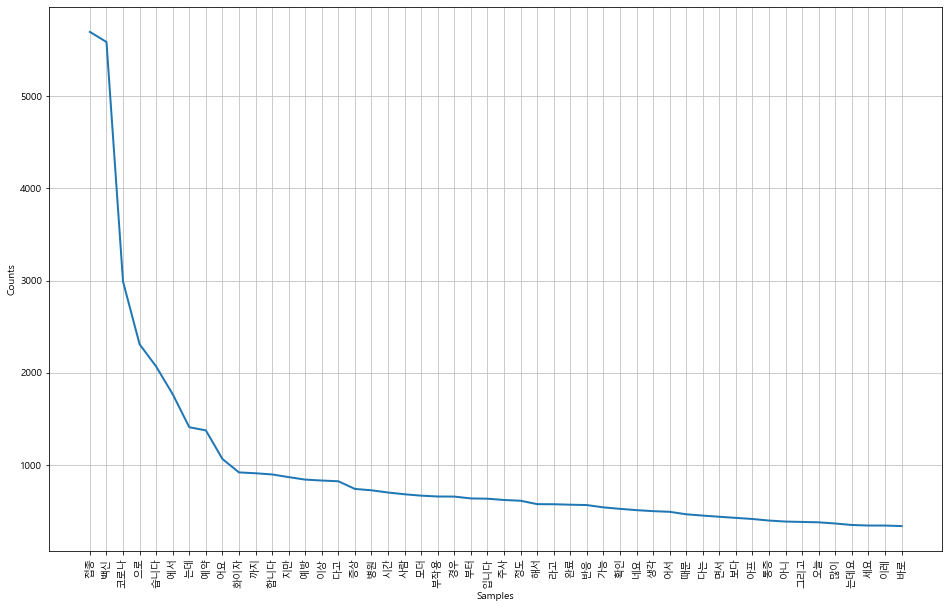

In [17]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

In [18]:
# 여러 리스트들을 하나로 묶어 주는 함수입니다.
def list_to_str(List): 
    return " ".join(List)

In [24]:
print(list_to_str(train_data[1]))

한국 이제 코로나 백신 접종 은데요


In [20]:
# Linear classification에 필요한 라이브러리 불러오기
from sklearn.pipeline import Pipeline 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# 학습을 위해 데이터셋 모양 동일하기 
train_x = [list_to_str(doc) for doc, _ in train_data]
train_y = [label for _, label in train_data]

# 학습 모델 파이프라인 만들기 

# 1. Perceptron linear classifier
learner = Pipeline([
    ('vect', CountVectorizer(min_df = 5)),
    ('clf', SGDClassifier(loss='perceptron', penalty='l2', # l2 규제 (알파벳 l)
                        alpha=1e-4, random_state=42,
                        max_iter=100))
])

# 2. SVM with linear kernel
learner2 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# 3. SVM with polynomial kernel
learner3 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='poly', degree=8))
])

# 4. SVM with Radius Basis Function kernel
learner4 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='rbf'))
])

# 5. SVM with sigmoid kernel 
learner5 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SVC(kernel='sigmoid'))
])

# 6. Naive Bayes classifier (Multinomial Ver.)
learner6 = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])
# n-gram 쓰는 이유가 단어가 어떤 단어와 함께 오는지를 봐야 하는 것이 중요하기 때문

# 학습기 정하기 
classifier = learner2

# 학습 
classifier.fit(train_x, train_y)
train_predict = classifier.predict(train_x)
train_accuracy = np.mean(train_predict == train_y)


# 테스트 및 성능 측정
print('For %d test data' % len(test_x))
print('Training Accuracy : %.2f' % train_accuracy)

ValueError: too many values to unpack (expected 2)